

#Proyek Machine Learning Dan Deep Learning - Klasifikasi Heart Disease
  Dataset yang digunakan dalam proyek ini adalah "Heart Disease Data". Dataset ini merupakan kumpulan data dari orang-orang yang memiliki penyakit jantung. Dataset ini memiliki 21 kolom dan 10000 baris. Data ini sesuai untuk binary classification. Data ini akan dibuat model untuk mengklasifikasikan orang yang memiliki penyakit jantung menjadi 2, yaitu ada penyakit jantung dan tidak ada penyakit jantung
   


Nama : Cahya Abdurrahman (cahya_a)

# **Import Library**

Pada tahap ini, kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk pembangunan model machine learning dan deep learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import zipfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# **Load Dataset**

In [ ]:
from google.colab import files
files.upload()  # Pilih file kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tweeezt","key":"b020632a6d6e7df0e402a3451d1ddaee"}'}

Mengunduh dataset heart disease dari kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d oktayrdeki/heart-disease

!unzip heart-disease.zip

Dataset URL: https://www.kaggle.com/datasets/oktayrdeki/heart-disease
License(s): other
  0% 0.00/568k [00:00<?, ?B/s]
100% 568k/568k [00:00<00:00, 688MB/s]
Archive:  heart-disease.zip
  inflating: heart_disease.csv       


In [ ]:
df = pd.read_csv("/content/heart_disease.csv")

df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **About Dataset**
Dataset ini berisi berbagai indikator kesehatan dan faktor risiko yang berhubungan dengan penyakit jantung. Parameter seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, kebiasaan merokok, dan pola olahraga dikumpulkan untuk menganalisis risiko penyakit jantung serta berkontribusi dalam penelitian kesehatan.

Variabel pada dataset ini sebagai berikut:

**Age**: Usia individu.

**Gender**:  Jenis kelamin individu (Male or Female).

**Blood Pressure**: Tekanan darah individu. (systolic).

**Cholesterol Level**: Total kadar kolesterol dalam tubuh individu.

**Exercise Habits**: Tingkat kebiasaan olahraga individu  (Low, Medium, High).

**Smoking**: Apakah individu merokok atau tidak (Yes or No).

**Family Heart Disease**: Apakah terdapat riwayat penyakit jantung dalam keluarga (Yes or No).

**Diabetes**: Apakah individu menderita diabetes (Yes or No).

**BMI**: Nilai indeks massa tubuh individu.

**High Blood Pressure**: Apakah individu memiliki tekanan darah tinggi  (Yes or No).

**Low HDL Cholesterol**: Apakah individu memiliki kadar HDL (kolesterol baik) yang rendah(Yes or No).

**High LDL Cholesterol**: Apakah individu memiliki kadar LDL (kolesterol jahat) yang tinggi (Yes or No).

**Alcohol Consumption**: Tingkat konsumsi alkohol individu (None, Low, Medium, High).

**Stress Level**: Tingkat stres individu (Low, Medium, High).

**Sleep Hours**:  Jumlah jam tidur individu setiap hari.

**Sugar Consumption**: Tingkat konsumsi gula individu(Low, Medium, High).

**Triglyceride Level**: Tingkat trigliserida dalam darah individu.

**Fasting Blood Sugar**:  Tingkat gula darah saat puasa.

**CRP Level**: Tingkat protein C-reaktif, penanda peradangan dalam tubuh.

**Homocysteine Level**: Tingkat homosistein, asam amino yang memengaruhi kesehatan pembuluh darah.

**Heart Disease Status**: Status individu terkait penyakit jantung (Yes or No).

#**Exploratory Data Analysis (EDA)**
Proses awal dalam analisis data yang bertujuan untuk memahami struktur, karakteristik, pola, dan hubungan dalam data sebelum dilakukan pemodelan atau analisis statistik lebih lanjut.

In [ ]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  

**Melihat missing values**

In [ ]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


Berdasarkan output di atas, hampir semua kolom memiliki missing value dengan "Alcohol Consumption" yang memiliki missing vaklue paling banyak yaitu sebesar 2586





**Melihat apakah ada data duplikat**

In [ ]:
duplicates = df.duplicated()

duplicate_count = duplicates.sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


Berdasarkan output diatas, tidak ditemukan ada data yang duplikat

**Melihat distribusi data numerik**

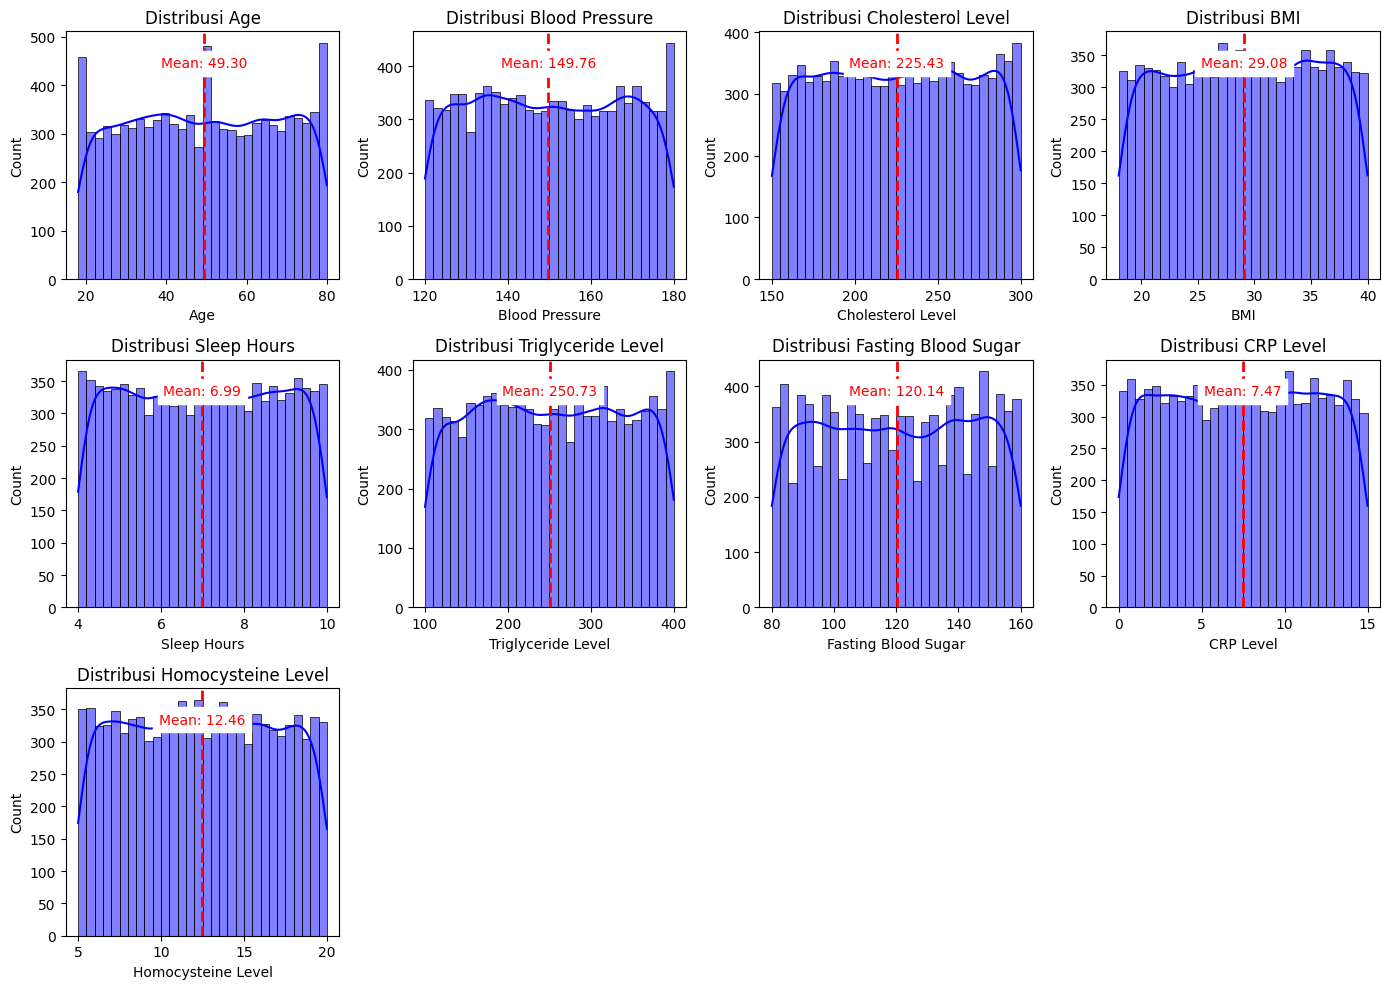

In [ ]:
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')

    mean_val = df[column].mean()

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)

    plt.text(mean_val, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}',
             color='red', ha='center', va='top', backgroundcolor='white')

    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

Data menunjukkan bahwa rata-rata individu berada pada usia paruh baya (49 tahun) dengan tekanan darah, kolesterol, trigliserida, gula darah puasa, dan kadar CRP yang relatif tinggi—mengindikasikan risiko besar terhadap penyakit kardiovaskular dan metabolik. Rata-rata BMI berada di kisaran overweight (29), dan kadar homosistein juga berada mendekati batas risiko. Satu-satunya faktor yang cukup ideal adalah durasi tidur, dengan rata-rata hampir 7 jam per hari. Secara keseluruhan, mayoritas individu memiliki profil kesehatan yang mengarah pada kondisi metabolik yang kurang baik.

**Melihat distribusi data kategorikal**

<ipython-input-129-50d7057eaa0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis')
<ipython-input-129-50d7057eaa0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis')
<ipython-input-129-50d7057eaa0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df[column], palette='viridis')
<ipython-input-129-50d7057eaa0f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set

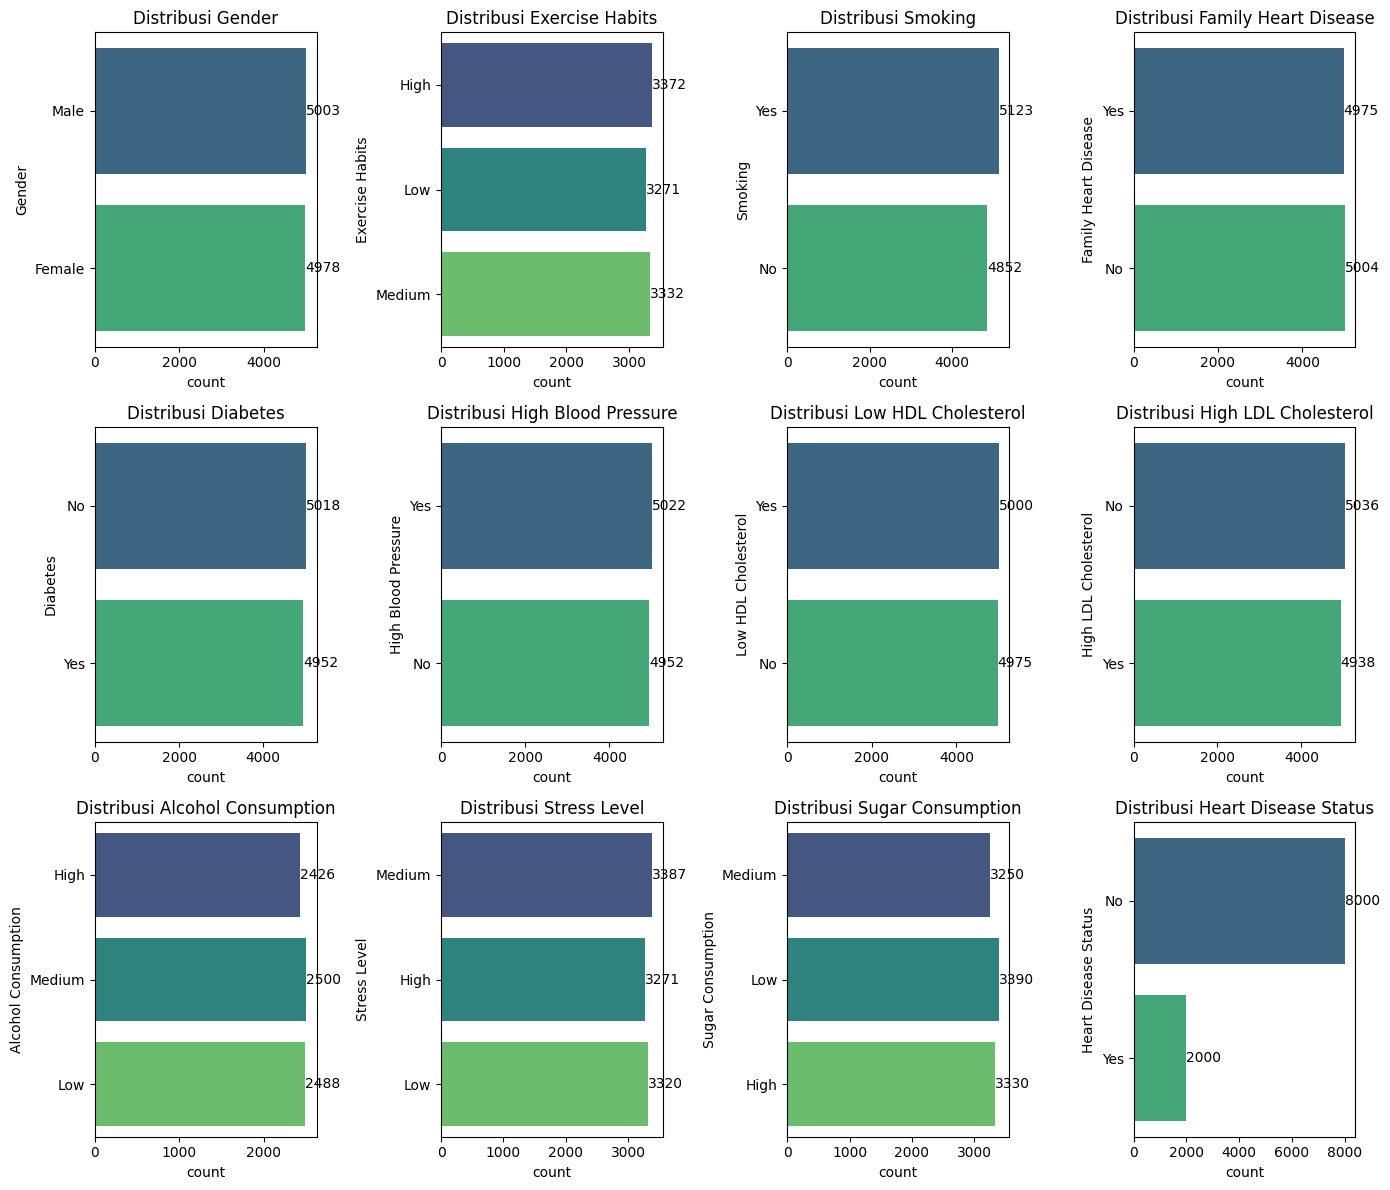

In [ ]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Plot distribusi untuk setiap kolom kategorikal dengan label count
plt.figure(figsize=(14, 4 * ((len(categorical_cols) - 1) // 4 + 1)))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) - 1) // 4 + 1, 4, i)
    ax = sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')

    for p in ax.patches:
        count = int(p.get_width())
        ax.text(count + 0.3, p.get_y() + p.get_height() / 2,
                str(count), va='center')

    plt.tight_layout()

plt.show()

Sebagian besar individu dalam data ini adalah pria dan sekitar separuh dari populasi memiliki kebiasaan merokok serta riwayat penyakit jantung dalam keluarga. Aktivitas fisik cenderung bervariasi, tetapi cukup banyak yang berada pada tingkat rendah hingga sedang. Sekitar separuh responden juga memiliki tekanan darah tinggi, kadar LDL tinggi, dan HDL rendah, yang merupakan faktor risiko utama penyakit jantung. Tingkat stres dan konsumsi gula cukup tinggi, sementara konsumsi alkohol lebih merata. Meskipun hanya 20% individu yang tercatat mengidap penyakit jantung, faktor-faktor risiko kesehatan yang signifikan tersebar luas dalam populasi.

**Melihat heatmap korelasi antar fitur**

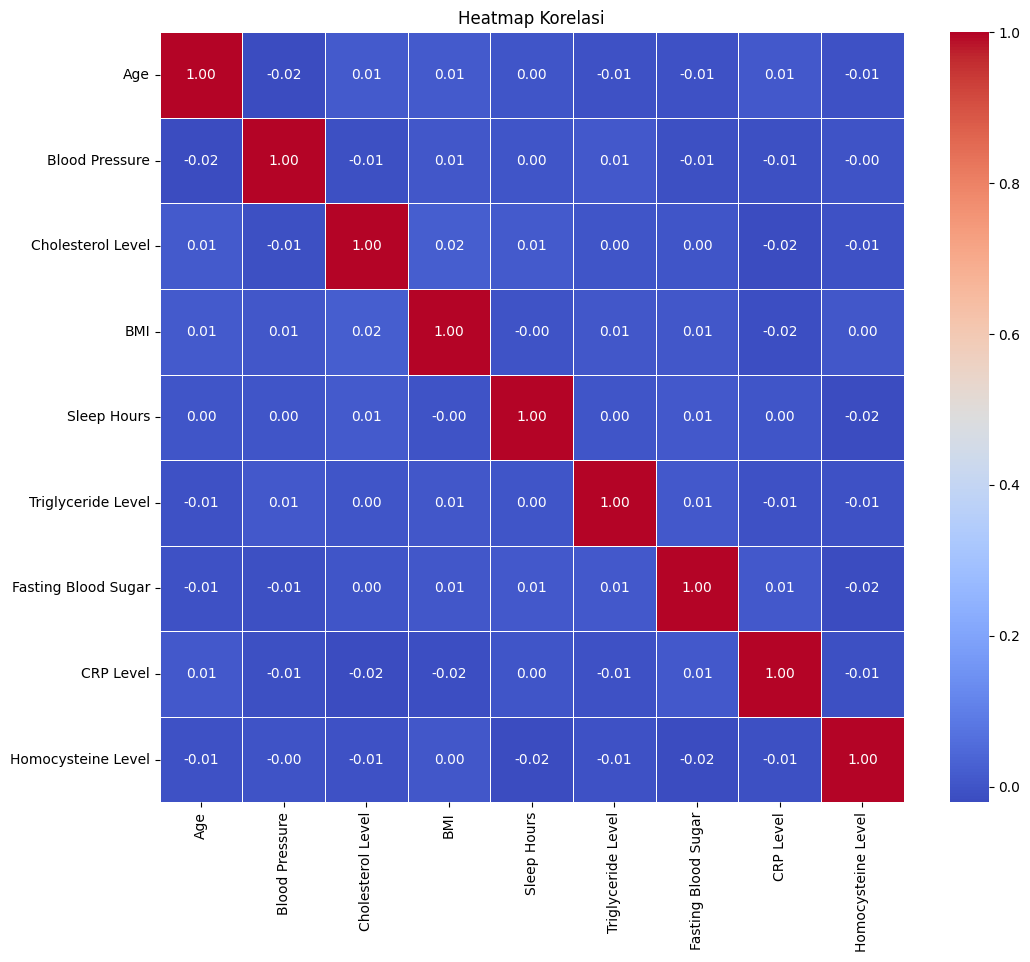

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Berdasarkan heatmap korelasi, tidak terdapat hubungan yang kuat antar variabel; seluruh nilai korelasi mendekati nol. Ini menunjukkan bahwa faktor-faktor seperti tekanan darah, kolesterol, BMI, gula darah, dan lainnya saling independen atau hanya memiliki hubungan yang sangat lemah. Artinya, setiap variabel kemungkinan memberi kontribusi unik terhadap kondisi kesehatan responden, dan tidak ada satu pun yang secara langsung berkorelasi tinggi dengan variabel lainnya dalam dataset ini.

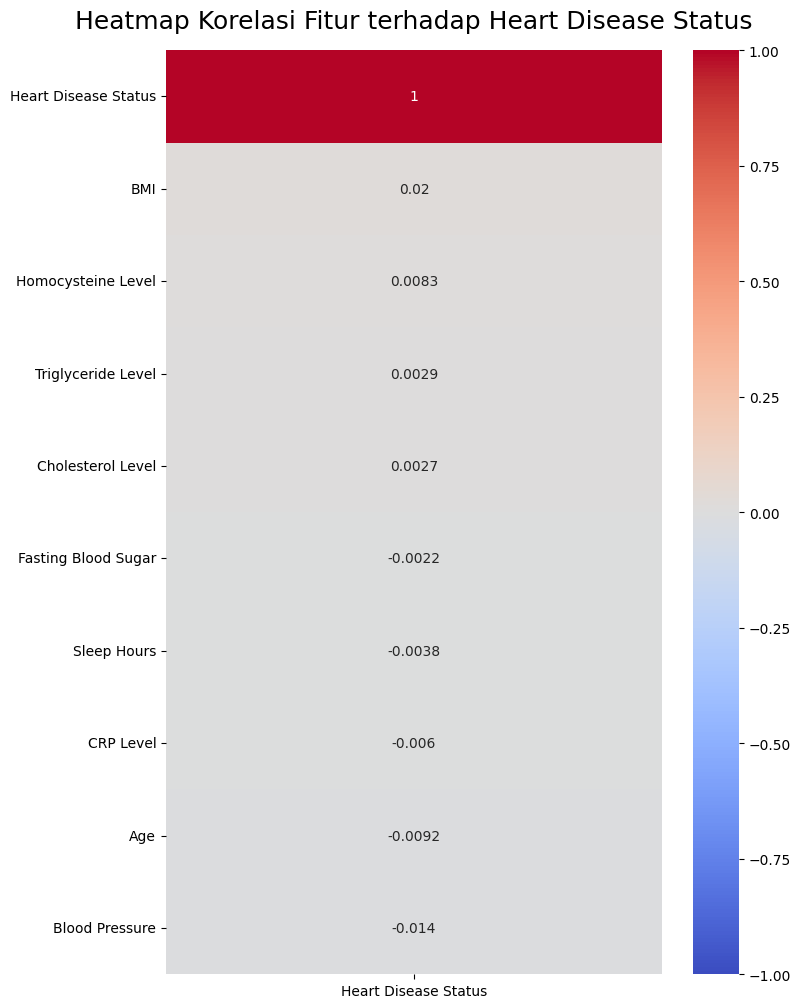

In [ ]:
# Salin dataframe agar tidak merusak aslinya
df_corr = df.copy()

df_corr['Heart Disease Status'] = df_corr['Heart Disease Status'].map({'No': 0, 'Yes': 1})

df_corr_numeric = df_corr.select_dtypes(include=['number'])

plt.figure(figsize=(8, 12))
corr_matrix = df_corr_numeric.corr()[['Heart Disease Status']].sort_values(by='Heart Disease Status', ascending=False)

ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
ax.set_title('Heatmap Korelasi Fitur terhadap Heart Disease Status', fontsize=18, pad=16)
plt.show()

Heatmap ini menunjukkan bahwa tidak ada variabel numerik yang memiliki korelasi kuat terhadap status penyakit jantung. Seluruh nilai korelasi sangat rendah, baik positif maupun negatif, dengan nilai tertinggi hanya sekitar 0,02 pada BMI. Ini mengindikasikan bahwa status penyakit jantung dalam data ini tidak dipengaruhi secara signifikan oleh satu pun variabel numerik secara langsung, sehingga kemungkinan besar faktor risiko lebih kompleks atau tersembunyi dalam interaksi antar variabel atau faktor kategorikal.

**Jumlah penderita penyakit vs tidak**

<ipython-input-134-156460d10381>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Heart Disease Status', palette=['blue', 'red'])


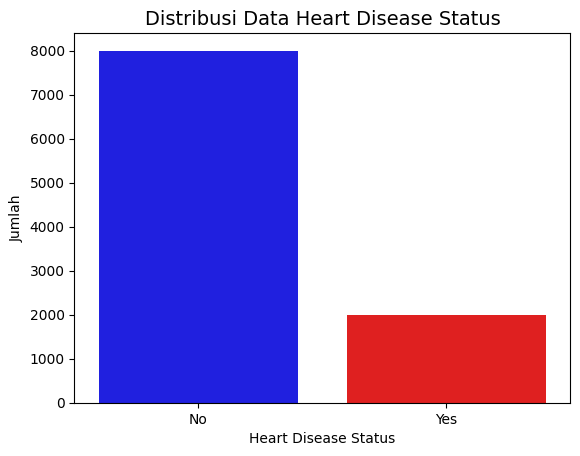

In [ ]:
sns.countplot(data=df, x='Heart Disease Status', palette=['blue', 'red'])
plt.title('Distribusi Data Heart Disease Status', fontsize=14)
plt.xlabel('Heart Disease Status')
plt.ylabel('Jumlah')
plt.show()


Distribusi data menunjukkan bahwa mayoritas invidividu (sekitar 80%) tidak memiliki penyakit jantung, sedangkan hanya sekitar 20% yang terdiagnosis.

**Melihat distribusi numerik berdasarkan memiliki penyakit vs tidak**

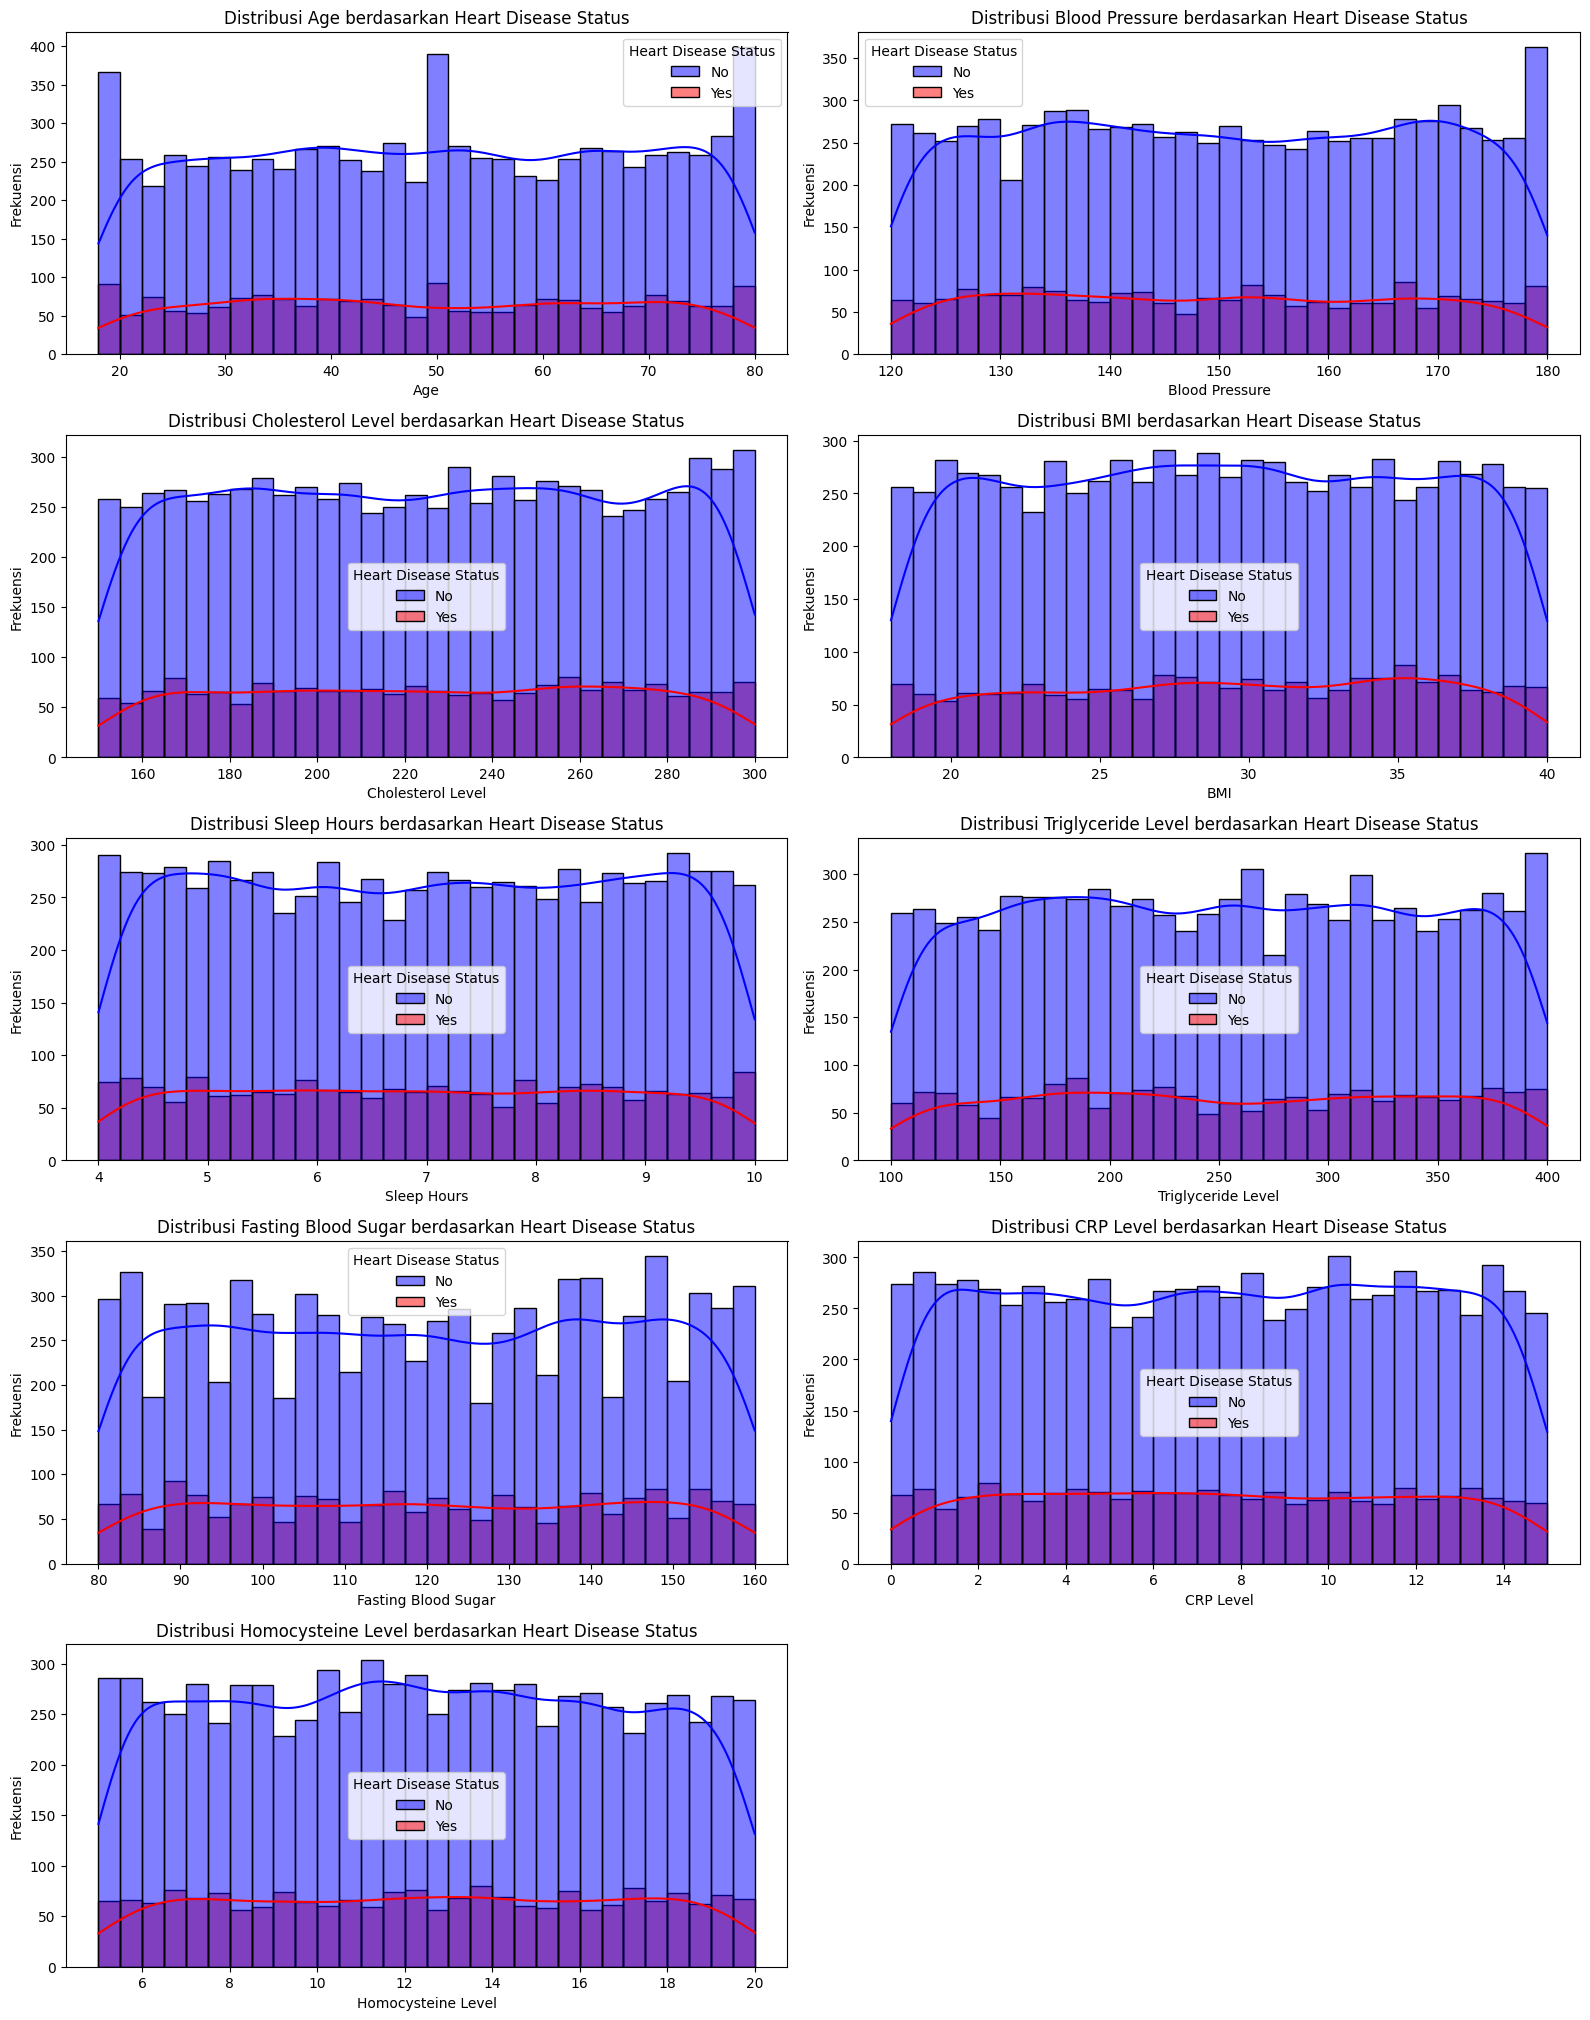

In [ ]:
num_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, len(num_features) * 4))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 2, i)
    sns.histplot(data=df, x=col, hue='Heart Disease Status', kde=True, bins=30,
                 palette={'No': 'blue', 'Yes': 'red'})
    plt.title(f'Distribusi {col} berdasarkan Heart Disease Status')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Gambar di atas menunjukkan distribusi berbagai fitur terhadap status penyakit jantung. Secara umum, individu dengan penyakit jantung ("Yes") cenderung memiliki nilai yang sedikit lebih tinggi pada tekanan darah, kadar kolesterol, BMI, gula darah puasa, CRP, dan homosistein dibandingkan yang tidak terkena. Namun, perbedaannya tidak terlalu mencolok, mengindikasikan bahwa tidak ada satu fitur pun yang dominan sebagai indikator tunggal penyakit jantung.

**Distribusi kategorikal terhadap penyakit jantung**

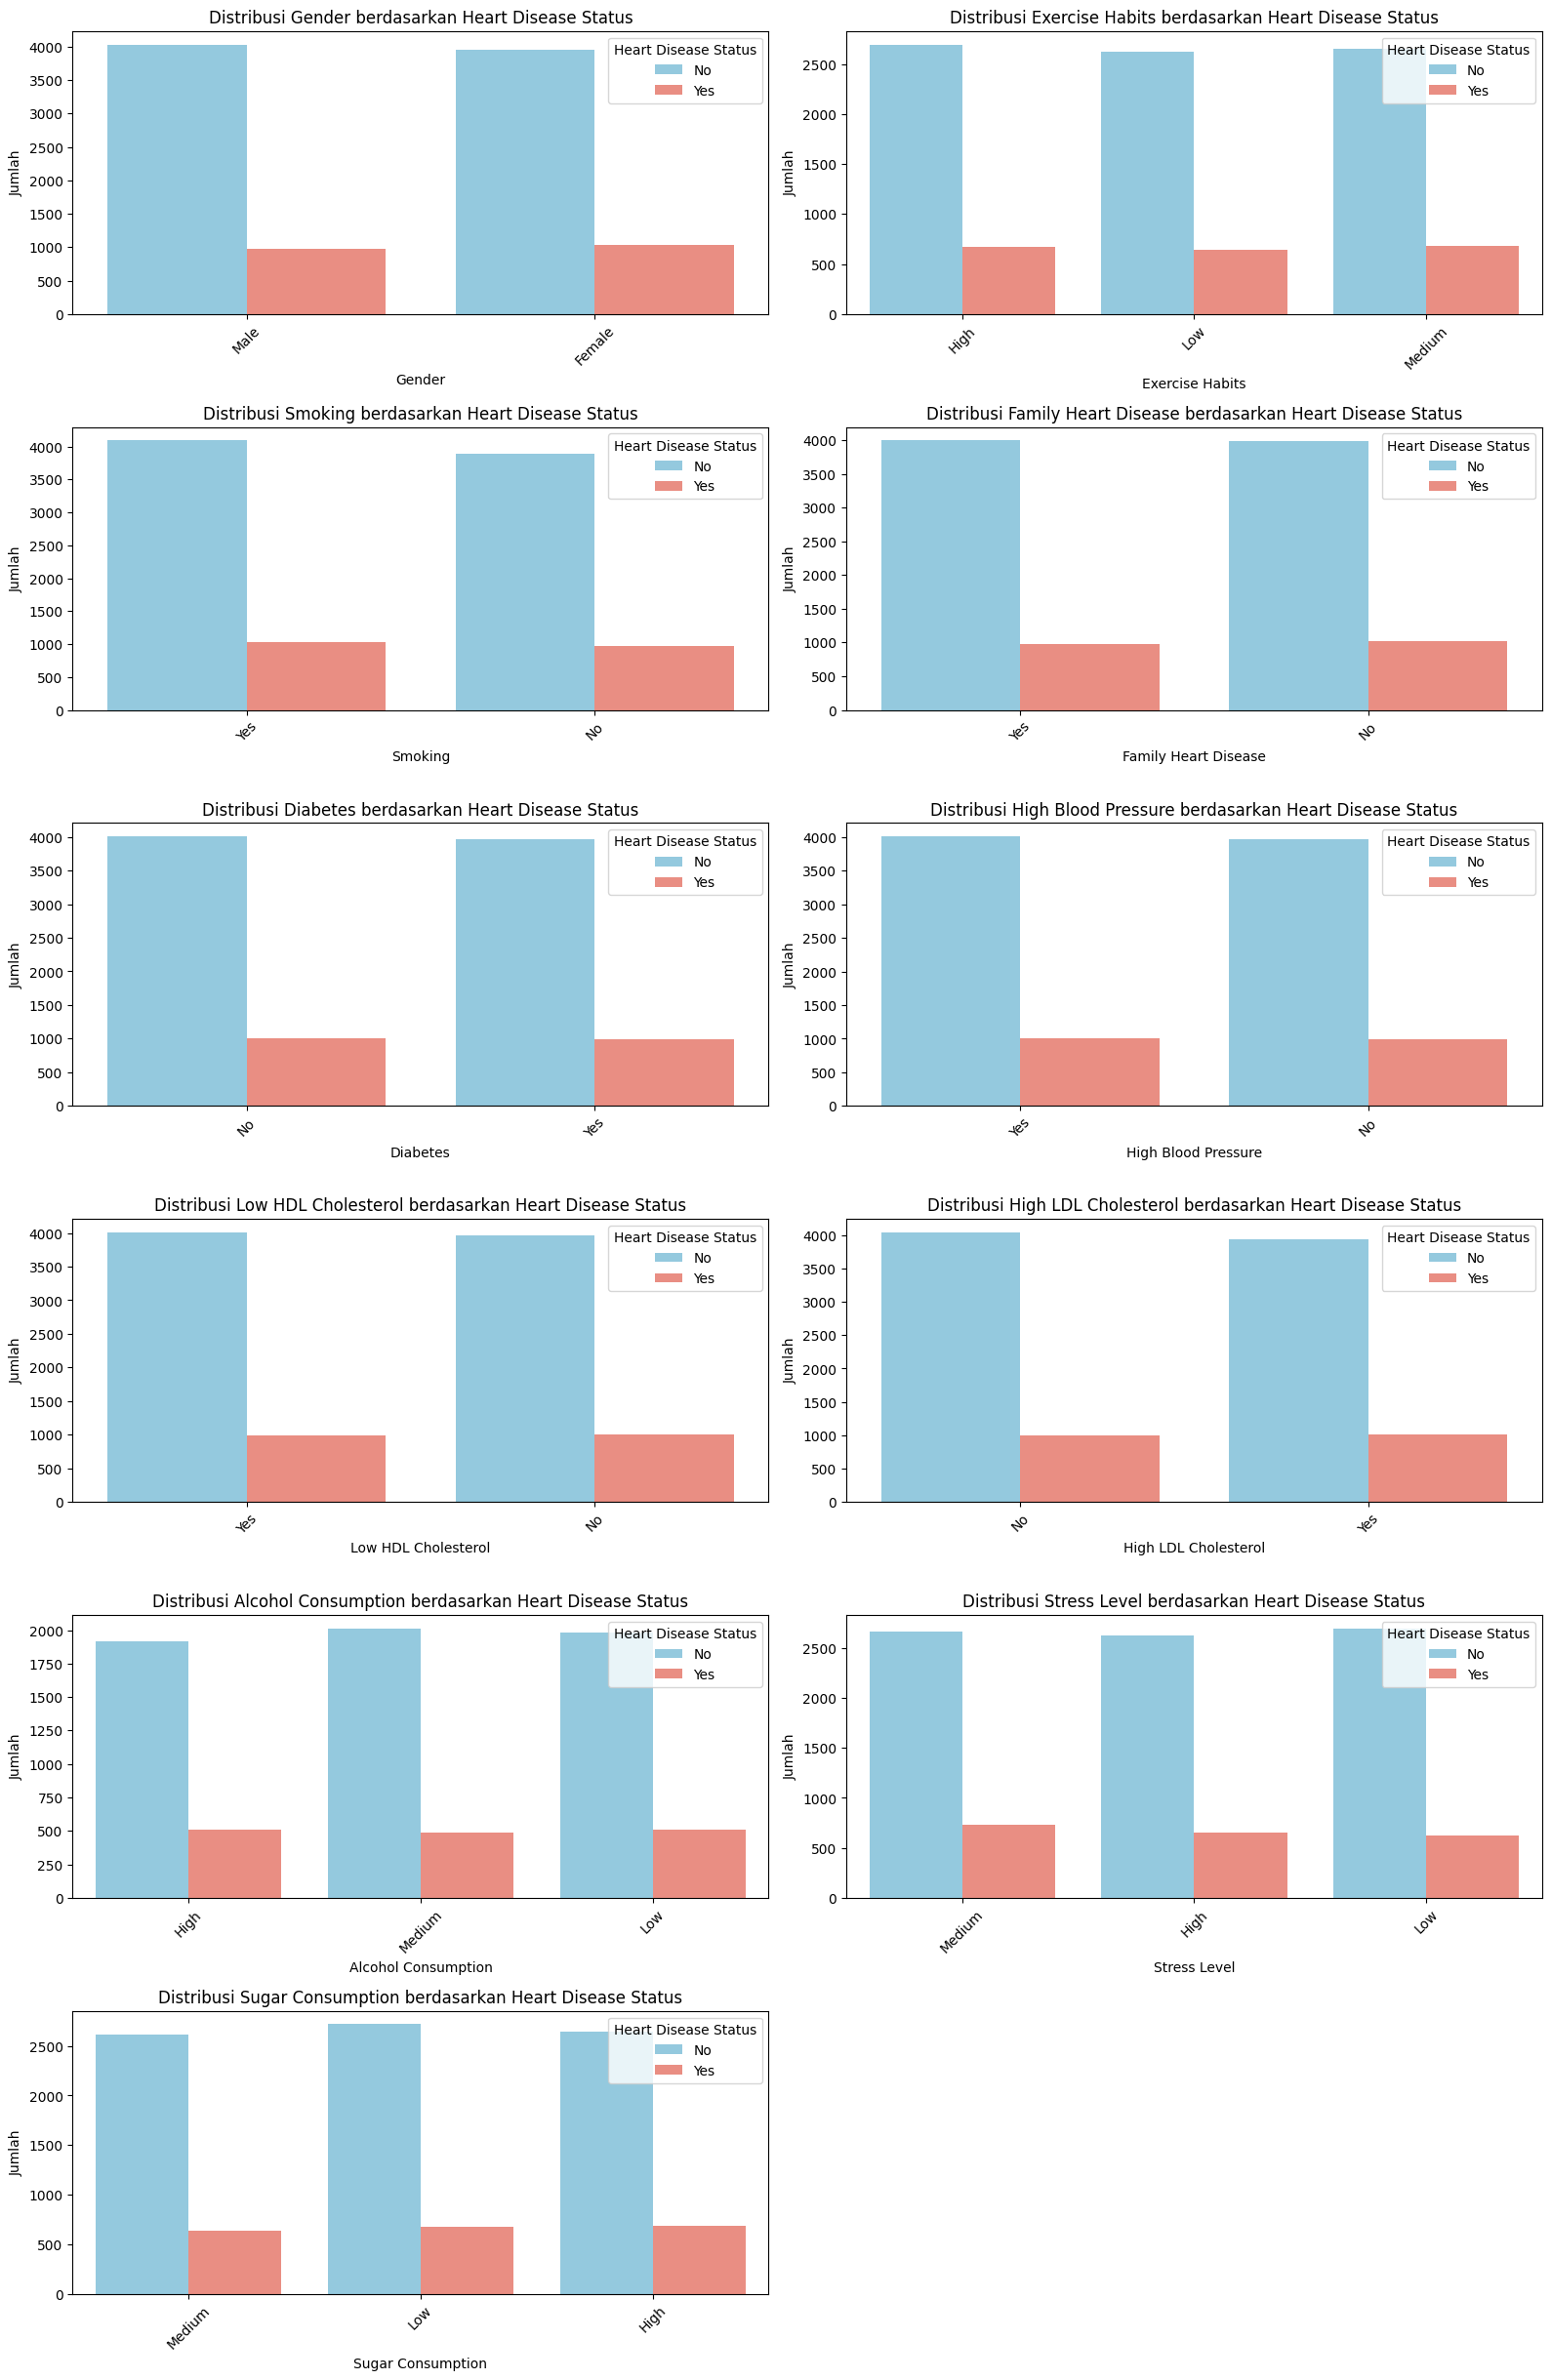

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop('Heart Disease Status')


plt.figure(figsize=(16, len(categorical_cols) * 4))

# Loop setiap kolom kategorikal
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(data=df, x=col, hue='Heart Disease Status',
                  palette={'No': 'skyblue', 'Yes': 'salmon'})
    plt.title(f'Distribusi {col} berdasarkan Heart Disease Status')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi distribusi fitur kategorikal terhadap status penyakit jantung, terlihat bahwa faktor-faktor seperti kebiasaan olahraga rendah, riwayat penyakit jantung dalam keluarga, tekanan darah tinggi, diabetes, kadar kolesterol LDL tinggi dan HDL rendah, serta tingkat stres yang tinggi, cenderung berasosiasi dengan peningkatan kasus penyakit jantung. Selain itu, merokok, konsumsi alkohol dan gula dalam jumlah tinggi juga menunjukkan keterkaitan meskipun tidak sekuat faktor-faktor utama tadi. Secara umum, kondisi kesehatan dan gaya hidup tampak berperan penting dalam status penyakit jantung.










# **Data Preparation**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.


**Menghapus missing value**

In [ ]:
jumlah_sebelum = len(df)
df = df.dropna()
jumlah_setelah = len(df)

print(f"Jumlah data sebelum drop missing value: {jumlah_sebelum}")
print(f"Jumlah data setelah drop missing value: {jumlah_setelah}")
print(f"Jumlah data yang dihapus: {jumlah_sebelum - jumlah_setelah}")


Jumlah data sebelum drop missing value: 10000
Jumlah data setelah drop missing value: 7067
Jumlah data yang dihapus: 2933


Dari 10000 data yang ada pada dataset, ternyata ada **2933** data yang memiliki missing value. Setelah di drop, sekarang jumlah data ada di **7067** data

**Menghilangkan data duplikat**

In [ ]:
len_before = len(df)
df = df.drop_duplicates()
len_after = len(df)

print(f"Jumlah data sebelum drop duplicate: {len_before}")
print(f"Jumlah data setelah drop duplicate: {len_after}")
print(f"Jumlah data yang dihapus (duplikat): {len_before - len_after}")


Jumlah data sebelum drop duplicate: 7067
Jumlah data setelah drop duplicate: 7067
Jumlah data yang dihapus (duplikat): 0


Tidak ditemukan data duplikat, maka dari itu data tetap berada di **7067**

**Menghilangkan outlier dari data**

In [ ]:
# Inisialisasi dictionary untuk menyimpan jumlah outlier
outliers_count = {}

# Loop untuk setiap fitur numerik
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    outliers_count[col] = outliers.sum()

print("Jumlah Outlier per Fitur:")
print(outliers_count)

Jumlah Outlier per Fitur:
{'Age': np.int64(0), 'Blood Pressure': np.int64(0), 'Cholesterol Level': np.int64(0), 'BMI': np.int64(0), 'Sleep Hours': np.int64(0), 'Triglyceride Level': np.int64(0), 'Fasting Blood Sugar': np.int64(0), 'CRP Level': np.int64(0), 'Homocysteine Level': np.int64(0)}


In [ ]:
# Menghapus outlier
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Ukuran data setelah menghapus outlier:", df.shape)


Ukuran data setelah menghapus outlier: (7067, 21)


Tidak ditemukan data yang memiliki outlier, maka dari itu data tetap berada di **7067**

**Oversampling data**
Oversampling perlu dilakukan karena dataset memiliki ketidakseimbangan, Metode oversampling yang dilakukan adalah SMOTE, yaitu menciptakan data sintetis berdasarkan interpolasi data kelas minoritas.

In [ ]:
df['Heart Disease Status'] = df['Heart Disease Status'].map({'No': 0, 'Yes': 1})

print("Sebelum Oversampling:")
print(df['Heart Disease Status'].value_counts())
print("\nPersentase:")
print((df['Heart Disease Status'].value_counts(normalize=True) * 100).round(2))

X = pd.get_dummies(df.drop('Heart Disease Status', axis=1))
y = df['Heart Disease Status']

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

df = pd.concat([X_res, y_res], axis=1)

print("\nSetelah Oversampling:")
print(df['Heart Disease Status'].value_counts())
print("\nPersentase:")
print((df['Heart Disease Status'].value_counts(normalize=True) * 100).round(2))

Sebelum Oversampling:
Heart Disease Status
0    5632
1    1435
Name: count, dtype: int64

Persentase:
Heart Disease Status
0    79.69
1    20.31
Name: proportion, dtype: float64

Setelah Oversampling:
Heart Disease Status
0    5632
1    5632
Name: count, dtype: int64

Persentase:
Heart Disease Status
0    50.0
1    50.0
Name: proportion, dtype: float64


Sekarang dataset memiliki jumlah data yang seimbang, dengan masing-masing kelas memiliki jumlah data yang seimbang yaitu 50% untuk kelas 0 dan 50% untuk kelas 1

**MinMax Scaling**





In [ ]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

df = pd.concat([X, y.reset_index(drop=True)], axis=1)

# Cek hasil scaling
print("Fitur berhasil dinormalisasi (0–1):")
print(df.head())


Fitur berhasil dinormalisasi (0–1):
        Age  Blood Pressure  Cholesterol Level       BMI  Sleep Hours  \
0  0.822581        0.433333           0.906667  0.328093     0.790657   
1  0.451613        0.100000           0.440000  0.538811     0.073314   
2  0.225806        0.033333           0.953333  0.278465     0.208156   
3  0.677419        0.766667           0.613333  0.112744     0.505116   
4  0.112903        0.533333           0.713333  0.461013     0.250739   

   Triglyceride Level  Fasting Blood Sugar  CRP Level  Homocysteine Level  \
0            0.110000               0.9625   0.623548            0.953311   
1            0.976667               0.1500   0.847382            0.415312   
2            0.643333               0.1750   0.833981            0.063959   
3            0.543333               0.9250   0.692001            0.210125   
4            0.086667               0.1375   0.286057            0.387642   

   Gender_Female  ...  Alcohol Consumption_High  Alcohol Consu

MinMax scaling dilakukan untuk memastikan data asli dan sintetis memiliki skala yang sama, selain itu MinMax scaling juga berguna untuk algoritma machine learning yang sensitif seperti KNN

**Mengisi data kosong dengan median**

In [ ]:
imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df)


Split data untuk train dan test (80% train/20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# **Machine Learning**

**Modelling**

**Pembangunan model**

In [ ]:
models_and_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150, 200, 250, 300]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3,5,7,9,11,13,15],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "learning_rate": [0.01, 0.1],
            "n_estimators": [100, 150, 200]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": {}
    }
}

**Mencari parameter terbaik untuk pembangunan model**

In [ ]:
best_estimators = {}

print("🔍 Hyperparameter tuning:\n")
for name, mp in models_and_params.items():
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f"{name} Best Params: {grid.best_params_}")

🔍 Hyperparameter tuning:

RandomForest Best Params: {'n_estimators': 50}
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Params: {'learning_rate': 0.1, 'n_estimators': 100}
NaiveBayes Best Params: {}


Hasil hyperparameter tuning menunjukkan bahwa Random Forest bekerja terbaik dengan 50 pohon, menandakan bahwa penambahan pohon lebih banyak tidak memberikan peningkatan signifikan. KNN optimal menggunakan jarak Manhattan, 13 neighbor, dan bobot berdasarkan jarak, yang menunjukkan bahwa model ini memerlukan tetangga cukup banyak dengan pengaruh yang lebih besar pada tetangga terdekat. Untuk XGBoost, learning rate 0.1 dan 100 estimator sudah cukup untuk mencapai performa terbaik tanpa risiko overfitting. Sedangkan Naive Bayes tidak memiliki parameter yang perlu diatur, sehingga dipakai sebagai baseline sederhana.


**Training Dan Evaluasi**

In [ ]:
summary = []

print("\n Evaluasi Model:\n")
for name, model in best_estimators.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    summary.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })


 Evaluasi Model:


RandomForest
Accuracy:  0.8748
Precision: 0.9953
Recall:    0.7531
F1 Score:  0.8574

KNN
Accuracy:  0.8682
Precision: 0.9882
Recall:    0.7451
F1 Score:  0.8496


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:40:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy:  0.8762
Precision: 1.0000
Recall:    0.7522
F1 Score:  0.8586

NaiveBayes
Accuracy:  0.8726
Precision: 1.0000
Recall:    0.7451
F1 Score:  0.8539


In [ ]:
summary_df = pd.DataFrame(summary)
print("\nRINGKASAN HASIL EVALUASI:\n")
print(summary_df.set_index('Model').round(4))


RINGKASAN HASIL EVALUASI:

              Accuracy  Precision  Recall  F1 Score
Model                                              
RandomForest    0.8748     0.9953  0.7531    0.8574
KNN             0.8682     0.9882  0.7451    0.8496
XGBoost         0.8762     1.0000  0.7522    0.8586
NaiveBayes      0.8726     1.0000  0.7451    0.8539


Pada tahap ini, dilakukan training dan evaluasi terhadap beberapa model machine learning.

   Dari hasil evaluasi, dapat dilihat model RandomForest memiliki performa terbaik berdasarkan metrik **Accuracy** di (87,48%) dibandingkan model lainnya.

# **Deep Learning**

**Data splitting (80% train/20%test)**

In [ ]:
X = df.drop(columns=["Heart Disease Status"])
y = df["Heart Disease Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Pembangunan model**
- **Input Layer:** Menerima sejumlah fitur numerik sesuai jumlah kolom pada dataset (berdasarkan X_train.shape[1]).

- **Lapisan Tersembunyi (Hidden Layers):**

 - Dense layer dengan 32 neuron dan aktivasi ReLU.

 - Dropout layer (rate 0.4) untuk mengurangi risiko overfitting.

 - Dense layer dengan 64 neuron dan aktivasi ReLU.

 - Dropout layer (rate 0.3) untuk regularisasi tambahan.

 - Dense layer dengan 128 neuron dan aktivasi ReLU guna menangkap pola lebih kompleks.

- **Output Layer:** Satu neuron dengan aktivasi sigmoid untuk memproduksi probabilitas klasifikasi biner.






In [ ]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy','precision', 'recall' ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training model dan evaluasi awal**

Proses training diterapkan callback untuk memberhentikan proses training ketika hasil tidak membaik. proses training juga menerapkan checkpoint untuk menyimpan hasil terbaik

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n Evaluation Metrics:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Epoch 1/100
216/226 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 0.6567 - precision: 0.5713 - recall: 0.6583

226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5836 - loss: 0.6548 - precision: 0.5742 - recall: 0.6586 - val_accuracy: 0.8253 - val_loss: 0.4434 - val_precision: 0.9093 - val_recall: 0.7304 - learning_rate: 0.0010
Epoch 2/100
208/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7522 - loss: 0.5156 - precision: 0.7821 - recall: 0.7039

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7532 - loss: 0.5140 - precision: 0.7833 - recall: 0.7041 - val_accuracy: 0.8519 - val_loss: 0.3782 - val_precision: 0.9491 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 3/100
217/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4460 - precision: 0.8508 - recall: 0.7263

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.4456 - precision: 0.8518 - recall: 0.7258 - val_accuracy: 0.8552 - val_loss: 0.3624 - val_precision: 0.9911 - val_recall: 0.7228 - learning_rate: 0.0010
Epoch 4/100
214/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4051 - precision: 0.8993 - recall: 0.7139

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4052 - precision: 0.8999 - recall: 0.7136 - val_accuracy: 0.8564 - val_loss: 0.3542 - val_precision: 0.9955 - val_recall: 0.7217 - learning_rate: 0.0010
Epoch 5/100
217/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.3843 - precision: 0.9293 - recall: 0.7172

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8332 - loss: 0.3844 - precision: 0.9294 - recall: 0.7171 - val_accuracy: 0.8613 - val_loss: 0.3416 - val_precision: 0.9970 - val_recall: 0.7304 - learning_rate: 0.0010
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3712 - precision: 0.9425 - recall: 0.7278 - val_accuracy: 0.8597 - val_loss: 0.3435 - val_precision: 0.9985 - val_recall: 0.7261 - learning_rate: 0.0010
Epoch 7/100
210/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3515 - precision: 0.9496 - recall: 0.7425

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8495 - loss: 0.3525 - precision: 0.9498 - recall: 0.7409 - val_accuracy: 0.8641 - val_loss: 0.3324 - val_precision: 0.9985 - val_recall: 0.7348 - learning_rate: 0.0010
Epoch 8/100
214/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.3531 - precision: 0.9575 - recall: 0.7282

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3532 - precision: 0.9578 - recall: 0.7280 - val_accuracy: 0.8658 - val_loss: 0.3322 - val_precision: 0.9985 - val_recall: 0.7380 - learning_rate: 0.0010
Epoch 9/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8435 - loss: 0.3583 - precision: 0.9565 - recall: 0.7196 - val_accuracy: 0.8630 - val_loss: 0.3364 - val_precision: 1.0000 - val_recall: 0.7315 - learning_rate: 0.0010
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.3437 - precision: 0.9703 - recall: 0.7309 - val_accuracy: 0.8602 - val_loss: 0.3416 - val_precision: 1.0000 - val_recall: 0.7261 - learning_rate: 0.0010
Epoch 11/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8588 - loss: 0.3411 - precision: 0.9740 - recall: 0.7297 - val_accuracy: 0.8597 - val_loss: 0.3395 - val_precision: 1.0000 - val_recall: 0.7250 - learning_rate: 0.0010
Epoch 12/100
210/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.85

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8575 - loss: 0.3348 - precision: 0.9788 - recall: 0.7324 - val_accuracy: 0.8669 - val_loss: 0.3290 - val_precision: 1.0000 - val_recall: 0.7391 - learning_rate: 0.0010
Epoch 13/100
213/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3346 - precision: 0.9726 - recall: 0.7360

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8581 - loss: 0.3346 - precision: 0.9728 - recall: 0.7357 - val_accuracy: 0.8758 - val_loss: 0.3145 - val_precision: 1.0000 - val_recall: 0.7565 - learning_rate: 0.0010
Epoch 14/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3322 - precision: 0.9769 - recall: 0.7395 - val_accuracy: 0.8647 - val_loss: 0.3321 - val_precision: 1.0000 - val_recall: 0.7348 - learning_rate: 0.0010
Epoch 15/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8667 - loss: 0.3260 - precision: 0.9840 - recall: 0.7432 - val_accuracy: 0.8713 - val_loss: 0.3185 - val_precision: 1.0000 - val_recall: 0.7478 - learning_rate: 0.0010
Epoch 16/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3455 - precision: 0.9804 - recall: 0.7166 - val_accuracy: 0.8691 - val_loss: 0.3239 - val_precision: 1.0000 - val_recall: 0.7435 - learning_rate: 0.0010
Epoch 17/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8664 - loss: 0.3231 - precision: 0.9914 - recall: 0.7417 - val_accuracy: 0.8758 - val_loss: 0.3126 - val_precision: 1.0000 - val_recall: 0.7565 - learning_rate: 2.0000e-04
Epoch 21/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8660 - loss: 0.3280 - precision: 0.9905 - recall: 0.7356 - val_accuracy: 0.8735 - val_loss: 0.3153 - val_precision: 1.0000 - val_recall: 0.7522 - learning_rate: 2.0000e-04
Epoch 22/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8677 - loss: 0.3253 - precision: 0.9926 - recall: 0.7385 - val_accuracy: 0.8730 - val_loss: 0.3153 - val_precision: 1.0000 - val_recall: 0.7511 - learning_rate: 2.0000e-04
Epoch 23/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3206 - precision: 0.9941 - recall: 0.7408 - val_accuracy: 0.8724 - val_loss: 0.3170 - val_precision: 1.0000 - val_recall: 0.7500 - learning_rate: 2.0000e-04
Epoch 24/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8696 - loss: 0.3162 - precision: 0.9917 - recall: 0.7461 - val_accuracy: 0.8758 - val_loss: 0.3125 - val_precision: 1.0000 - val_recall: 0.7565 - learning_rate: 2.0000e-04
Epoch 26/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3175 - precision: 0.9857 - recall: 0.7468 - val_accuracy: 0.8741 - val_loss: 0.3143 - val_precision: 1.0000 - val_recall: 0.7533 - learning_rate: 2.0000e-04
Epoch 27/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3185 - precision: 0.9911 - recall: 0.7435 - val_accuracy: 0.8730 - val_loss: 0.3164 - val_precision: 1.0000 - val_recall: 0.7511 - learning_rate: 2.0000e-04
Epoch 28/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3150 - precision: 0.9928 - recall: 0.7464 - val_accuracy: 0.8730 - val_loss: 0.3180 - val_precision: 1.0000 - val_recall: 0.7511 - learning_rate: 2.0000e-04
Epoch 29/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**Load model terbaik dari hasil training awal**

In [ ]:
best_model = load_model("/content/best_model.h5")

In [ ]:
best_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,715 (45.77 KB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model memiliki 11.715 parameter, model ini dibuat untuk mempelajari pola dari dataset dan menghasilkan probabilitas untuk menentukan apakah seseorang menderita penyakit hati atau tidak

In [ ]:
loss, accuracy, precision, recall = best_model.evaluate(X_test, y_test, verbose=1)

print("\nBest Model Evaluation:")
print(f"Loss:      {loss:.4f}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8735 - loss: 0.3194 - precision_8: 1.0000 - recall_8: 0.7418

Best Model Evaluation:
Loss:      0.3196
Accuracy:  0.8735
Precision: 1.0000
Recall:    0.7469


**Insight**

Model menunjukkan performa sangat baik secara umum, dengan akurasi tinggi (87.35%) dan presisi sempurna (100%), artinya semua prediksi positif benar (tidak ada false positive). Namun, recall cukup rendah (74.69%), yang berarti masih ada sejumlah kasus positif yang tidak berhasil terdeteksi (false negative).

 Loss sebesar (31.96%) menunjukkan bahwa prediksi model cukup konsisten, tetapi masih ada ruang untuk perbaikan, terutama dalam meningkatkan recall agar model tidak terlalu “hati-hati” dalam mendeteksi kasus positif.

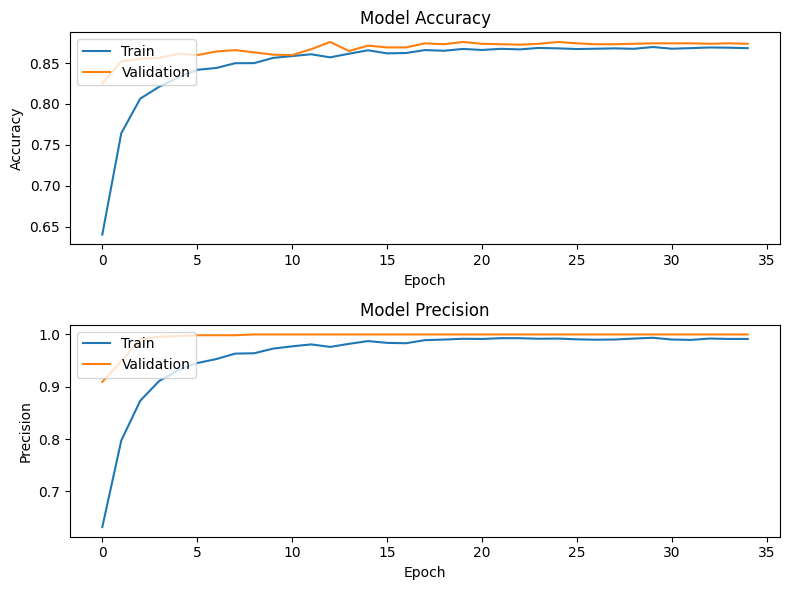

In [ ]:
plt.figure(figsize=(8, 6))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Precision
plt.subplot(2, 1, 2)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Grafik diatas menunjukkan bahwa model memiliki performa yang sangat baik, dengan akurasi dan presisi yang tinggi pada data pelatihan maupun validasi. Akurasi meningkat tajam pada epoch awal dan mulai stabil sekitar epoch ke-15, bertahan di kisaran 0.86–0.88 tanpa adanya tanda overfitting yang signifikan, karena kurva validasi mengikuti tren pelatihan dengan sangat baik. Presisi bahkan lebih tinggi, mencapai hampir 1.0 sejak awal pelatihan, yang mengindikasikan model sangat jarang memberikan prediksi positif yang salah.  Secara keseluruhan, model tampak sangat stabil dan akurat.

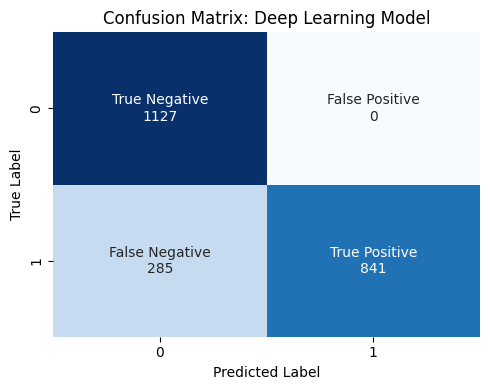

In [ ]:
cm = confusion_matrix(y_test, y_pred)


labels = np.array([["True Negative", "False Positive"],
                   ["False Negative", "True Positive"]])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=labels + "\n" + cm.astype(str), fmt='', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Deep Learning Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Berdasarkan confusion matrix yang di atas, model  menunjukkan performa yang sangat baik dalam menghindari false positive, dengan nilai 0, yang berarti tidak ada data negatif yang salah diklasifikasikan sebagai positif. Ini memperkuat hasil presisi tinggi yang terlihat sebelumnya. Namun, terdapat 285 false negative, yang berarti cukup banyak data positif yang gagal dikenali oleh model dan malah diklasifikasikan sebagai negatif. Meskipun jumlah true positive (841) masih cukup tinggi, angka false negative ini menunjukkan bahwa model agak lemah dalam hal recall, yaitu kemampuannya mendeteksi semua data positif.